### Import package and set global variables

In [3]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.simplefilter(action='ignore', category=FutureWarning)

### Data import

In [4]:
loan=pd.read_csv("/Users/syedinayathulla/Library/Containers/com.microsoft.Excel/Data/Downloads/loan.csv", low_memory=False)
loan_stats = pd.read_excel("https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx", sheet_name = 0)
reject_stats = pd.read_excel("https://cdn.upgrad.com/UpGrad/temp/af860da6-f838-47d6-ad97-551022550ee4/Data_Dictionary.xlsx", sheet_name = 1)

print("Shape of loan dataset is :", loan.shape)
print("Shape of loan_stats dataset is :", loan_stats.shape)
print("Shape of reject_stats dataset is :", reject_stats.shape)

Shape of loan dataset is : (39717, 111)
Shape of loan_stats dataset is : (117, 2)
Shape of reject_stats dataset is : (9, 2)


In [71]:
def print_desc(val, df=loan_stats,col='LoanStatNew'):
    '''
    print loan variable description
    val : key whose description to be printed
    df  : dataframe name
    col : column name 
    '''
    colwidth = pd.get_option('max_colwidth')
    pd.set_option('max_colwidth', 200)
    desc = df.Description[df[col] == val]
    print(col,"[",val,"]", " :\n\t", desc)
    pd.set_option('max_colwidth', colwidth)
    print("\n")


def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(12,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data=df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data=df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots(nrows =1,ncols=1,figsize=(12,8))
        ax.set_title(col+" vs "+hue )
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        order = df[col].value_counts().index
        
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=order, hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()


def plot_pie(df,col,fsize,splot,label='',hue='loan_status',category=0):
    '''
    Create a pie plot for given dataframe
    df : dataframe name
    col : column name
    fsize: figure size
    splot: subplot args e.g. (row, col)
    hue: default loan_status
    category: 1 for categorical variable with hue, 0 otherwise
    '''
    plt.figure(figsize=fsize)
    
    
    if category:
        cl = list(set(df[col]))
        i=1
        for c in cl:
            temp_df = df[df[col] == c]
            a, b = splot 
            plt.subplot(a,b,i)
            temp_df[hue].value_counts(sort=True).plot(kind='pie',autopct='%1.1f%%', startangle=90,textprops={'size': 'smaller'},)
            plt.title("\nCategory "+ str(c) +"")
            i=i+1
    else:
        a, b = splot
        #fig1, ax1 = plt.subplot(a,b,1)
        df[col].value_counts(sort=True).plot( kind='pie',autopct='%1.1f%%', startangle=90,textprops={'size': 'smaller'},)
        plt.title("\nDistribution of "+ col)
        
    plt.show()
    


### Data inspection

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [6]:
loan.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717,39717,39717.00,39717,39717,37258,38642,39717,39717.00,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.00,39717.00,39717,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39667,39717.00,39717,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39646,39717.00,1140,39715,39661.00,0.00,39717.00,39717,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
unique,nan,nan,nan,nan,nan,2,371,nan,7,35,28820,11,5,nan,3,55,3,1,39717,26527,14,19615,823,50,nan,nan,526,nan,nan,nan,nan,nan,nan,1089,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,101,nan,2,106,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,36 months,10.99%,nan,B,B3,US Army,10+ years,RENT,nan,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,nan,nan,Nov-98,nan,nan,nan,nan,nan,nan,0%,nan,f,nan,nan,nan,nan,nan,nan,nan,nan,nan,May-16,nan,Jun-16,May-16,nan,nan,nan,INDIVIDUAL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,29096,956,nan,12020,2917,134,8879,18899,nan,16921,2260,32950,39717,1,210,18641,2184,597,7099,nan,nan,370,nan,nan,nan,nan,nan,nan,977,nan,39717,nan,nan,nan,nan,nan,nan,nan,nan,nan,1256,nan,1125,10308,nan,nan,nan,39717,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,683131.91,850463.56,11219.44,10947.71,10397.45,NaN,NaN,324.56,NaN,NaN,NaN,NaN,NaN,68968.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.32,0.15,NaN,0.87,35.90,69.70,9.29,0.06,13382.53,NaN,22.09,NaN,51.23,50.99,12153.60,11

In [7]:
loan_stats.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [8]:
reject_stats.head()

,RejectStats File,Description
0,Amount Requested,The total amount requested by the borrower
1,Application Date,The date which the borrower applied
2,Loan Title,The loan title provided by the borrower
3,Risk_Score,"For applications prior to November 5, 2013 the..."
4,Debt-To-Income Ratio,A ratio calculated using the borrower’s total ...


###  Data cleaning and manipulation

#### Data cleaning at column level

> Drop columns containing only NaN

> Removing 'zip_code' column because we already have the state adress as 'addr_state'.

> Removing columns 'url','member_id','id', which are unique for all the record so its not relevant in our analysis

> Removing Descriptive columns 'emp_title','title','desc' which are not relevant in our analysis

> Removing columns 'tax_liens','chargeoff_within_12_mths' & 'collections_12_mths_ex_med' that has only 0 and NaN values since it is not required in our analysis

> Removing columns 'delinq_amnt','acc_now_delinq','application_type','policy_code','pymnt_plan', 'initial_list_status' that has only one value thus it is not required in our analysis

> Removing columns 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int',   'total_rec_late_fee','recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt' which informs about   the future and end of loan repayment and thus not required for default loan analysis

> Removing 'mths_since_last_delinq','mths_since_last_record','issue_d','funded_amnt_inv','next_pymnt_d', last_credit_pull_d', 'earliest_cr_line,'inq_last_6mths' columns since it is not required for default loan analysis

In [9]:
loan=loan.dropna(axis='columns', how='all')
loan=loan.drop(['zip_code'],axis=1)
loan=loan.drop(['url','member_id','id'],axis=1)
loan=loan.drop(['emp_title','title','desc'],axis=1)
loan=loan.drop(['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'],axis=1)
loan=loan.drop(['delinq_amnt','acc_now_delinq','application_type','policy_code','pymnt_plan','initial_list_status'],axis=1) 
loan=loan.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt'], axis=1)
loan=loan.drop(['issue_d','funded_amnt_inv', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record'], axis =1)

loan.shape


(39717, 22)

> Keep relevant loan_stats info 

In [10]:
loan_stats = loan_stats[loan_stats['LoanStatNew'].isin(list(loan.columns))]
loan_stats.shape

(22, 2)

#### Data cleaning at row level

> Remove 'Current' category from loan_status. Only 'Fully Paid' and 'Charged Off' is required for the final outcome of a loan

> Home ownership status values are: RENT, OWN, MORTGAGE, OTHER.

> Remove 'other' from the purpose column as this will not help us in solving our problem statement. 

In [11]:
loan = loan[(loan["loan_status"] == "Fully Paid") | 
            (loan["loan_status"] == "Charged Off")]

loan = loan[(loan['home_ownership'] == 'RENT') | 
            (loan['home_ownership'] == 'OWN') | 
            (loan['home_ownership'] == 'MORTGAGE') | 
            (loan['home_ownership'] == 'OTHER')]

loan = loan[(loan['purpose'] != 'other')]

#### Handling special characters

In [12]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

> Removing 'months' from 'term' column value

> Remove special character '%' from 'int_rate' and 'revol_util'columns

> Fetch number part of 'emp_length'
    

In [13]:
loan['term']  = loan['term'].map(lambda x: int(x.rstrip('months')))
loan['term']  = loan['term'].astype('int')

loan['int_rate']=loan['int_rate'].str.strip('%').astype('float')
loan['revol_util']=loan['revol_util'].str.strip('%').astype('float')

loan['emp_length']=loan['emp_length'].str.strip(' years')

In [14]:
loan.shape

(34711, 22)

> Summing up the missing values (column-wise) in percentage of loan after cleaning

In [15]:
round(100*(loan.isnull().sum()/len(loan.index)),2).sort_values(ascending=False)

emp_length             2.54
pub_rec_bankruptcies   1.70
revol_util             0.11
annual_inc             0.00
funded_amnt            0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
home_ownership         0.00
verification_status    0.00
total_acc              0.00
loan_status            0.00
purpose                0.00
addr_state             0.00
dti                    0.00
delinq_2yrs            0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
loan_amnt              0.00
dtype: float64

#### Data imputation

> For 'emp_length' below assumption is made:
>        1. 10+ is replaced by 10 (10 yrs and above are considered one bucket)
>        2. < 1 is replaced by 0 (between 0 and 1 year)
>        3. NaN or 'n/a' records are dropped

> Rounding off this annual_inc and convert to integer

> The variables 'pub_rec_bankruptcies' & 'revol_util' have null values 1.75% and 0.13% respectively . 
> We can safely assume there is no public record bankruptcies available.

In [16]:
set(loan['emp_length'])

{'1', '10+', '2', '3', '4', '5', '6', '7', '8', '9', '< 1', nan}

In [17]:
loan= loan[pd.notnull(loan['emp_length'])]
loan = loan[(loan['emp_length']!='n/')]
loan['emp_length']=loan['emp_length'].replace('10+','10')
loan['emp_length']=loan['emp_length'].replace('< 1','0')
loan['emp_length']=loan['emp_length'].astype(int)

loan['annual_inc']=round(loan['annual_inc'])
loan['annual_inc']=loan['annual_inc'].astype('int')

loan.loc[pd.isnull(loan['pub_rec_bankruptcies']),['pub_rec_bankruptcies']] = 0
loan['pub_rec_bankruptcies']  = loan['pub_rec_bankruptcies'].astype('int')

loan.loc[pd.isnull(loan['revol_util']),['revol_util']] = '0.0'
loan['revol_util']  = loan['revol_util'].astype('float')

loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc                int64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies      int64
dtype: object

#### Handling outliers

 > Drop rows with purpose category with insignificant percentage ( < 1% ) 
 > Drop rows with annual_inc (min: 4080, max: 6000000)

In [18]:
loan.purpose.value_counts()*100/len(loan)

debt_consolidation   52.24
credit_card          14.48
home_improvement      8.23
major_purchase        6.15
small_business        5.05
car                   4.28
wedding               2.70
medical               1.94
moving                1.63
house                 1.05
vacation              1.03
educational           0.94
renewable_energy      0.28
Name: purpose, dtype: float64

In [19]:
loan = loan[(loan['purpose'] != 'renewable_energy') & (loan['purpose'] != 'educational')]
loan.shape

(33419, 22)

In [20]:
loan.annual_inc.quantile([0.25, 0.50, 0.75, 0.99, 0.995, 1])

0.25     42000.00
0.50     60000.00
0.75     84000.00
0.99    235967.28
0.99    300000.00
1.00   6000000.00
Name: annual_inc, dtype: float64

In [21]:
q995 = loan["annual_inc"].quantile(0.995)
loan = loan[(loan['annual_inc'] <= q995)]
print(loan.shape)
print(loan.dtypes)

(33267, 22)
loan_amnt                 int64
funded_amnt               int64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc                int64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies      int64
dtype: object


###  Derived variables

> avail_credit_lines = (total_acc - open_acc)

> income_to_funded = (annual_inc/funded_amnt)

> loan_status_numeric mapped to 'Charged Off' => 0 and 'Fully Paid' => 1  

In [22]:
loan['avail_credit_lines'] =  loan.apply(lambda row: max(row.total_acc - row.open_acc,0), axis=1)
loan['income_to_funded'] =  loan.apply(lambda row: row.annual_inc/row.funded_amnt, axis=1)

status = {'Charged Off' : 0, 'Fully Paid' : 1}
loan['loan_status_numeric'] = loan['loan_status'].map(status)

avail_credit_lines = { 'LoanStatNew': 'avail_credit_lines',  'Description' : 'Number of total_acc minus open_acc'}
income_to_funded = {'LoanStatNew': 'income_to_funded',      'Description' : 'Ratio of total_inc and loan_amnt'}
loan_status_numeric = {'LoanStatNew': 'loan_status_numeric', 'Description' : 'Charged Off: 0 and Fully Paid: 1'}

loan_stats = loan_stats.append(avail_credit_lines, ignore_index=True)
loan_stats = loan_stats.append(income_to_funded, ignore_index=True)
loan_stats = loan_stats.append(loan_status_numeric, ignore_index=True)
loan_stats.drop_duplicates(keep='first', inplace=True)

print(loan.shape)
print(loan_stats.shape)

(33267, 25)
(25, 2)


> Create bins for continuous numerical category (loan_amnt, int_rate, annual_inc)

In [38]:
loan_amnt_bins = create_bins(loan['loan_amnt'],3)
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], loan_amnt_bins, include_lowest=True).astype(str)

int_rate_bins = create_bins(loan['int_rate'],3)
loan['int_rate_range'] = pd.cut(loan['int_rate'], int_rate_bins, include_lowest=True).astype(str)

annual_inc_bins = create_bins(loan['annual_inc'],3)
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], annual_inc_bins, include_lowest=True).astype(str)

avail_credit_lines_bins = create_bins(loan['avail_credit_lines'],3)
loan['avail_credit_lines_range'] = pd.cut(loan['avail_credit_lines'], avail_credit_lines_bins, include_lowest=True).astype(str)

income_to_funded_bins = create_bins(loan['income_to_funded'],3)
loan['income_to_funded_range'] = pd.cut(loan['income_to_funded'], income_to_funded_bins, include_lowest=True).astype(str)

dti_bins = create_bins(loan['dti'],3)
loan['dti_range'] = pd.cut(loan['dti'], dti_bins, include_lowest=True).astype(str)

loan['delinq_2yrs_range'] = pd.cut(loan['delinq_2yrs'], [-0.01,1,2,11], include_lowest=True).astype(str)


print("\nShape of loan dataset is:", loan.shape)



Shape of loan dataset is: (33267, 32)


> Consumer attributes:<br><b> 
emp_length, home_ownership, annual_inc, purpose, addr_state, dti</b>

> Loan attributes:<br><b>
funded_amnt, int_rate, verification_status, loan_status, delinq_2yrs, revol_bal, revol_util, total_acc, loan_amnt, term, installment, open_acc, pub_rec, grade, sub_grade</b>

In [39]:
loan.head(n=3)

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,avail_credit_lines,income_to_funded,loan_status_numeric,loan_amnt_range,int_rate_range,annual_inc_range,avail_credit_lines_range,income_to_funded_range,dti_range,delinq_2yrs_range
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,24000,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,13648,83.70,9,0,6,4.80,1,"(499.999, 12000.0]","(4.999, 12.0]","(4079.999, 102720.0]","(-0.001, 25.0]","(0.999, 68.0]","(20.0, 30.0]","(-0.011, 1.0]"
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,30000,Source Verified,Charged Off,car,GA,1.00,0,3,0,1687,9.40,4,0,1,12.00,0,"(499.999, 12000.0]","(12.0, 19.0]","(4079.999, 102720.0]","(-0.001, 25.0]","(0.999, 68.0]","(-0.001, 10.0]","(-0.011, 1.0]"
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,12252,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.50,10,0,8,5.11,1,"(499.999, 12000.0]","(12.0, 19.0]","(4079.999, 102720.0]","(-0.001, 25.0]","(0.999, 68.0]","(-0.001, 10.0]","(-0.011, 1.0]"


>

> Plots for continuous numeric variables<br><b>
> loan_amnt, emp_length, annual_inc, dti, revol_bal, revol_util, income_to_funded<b>

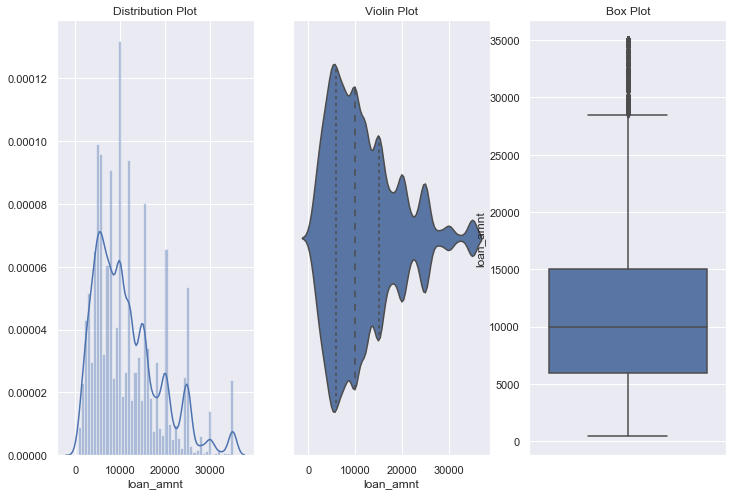

In [40]:
univariate(loan, 'loan_amnt', 0)

> <b>Insight:</b> Most of the loan_amount is between 6k to 15k

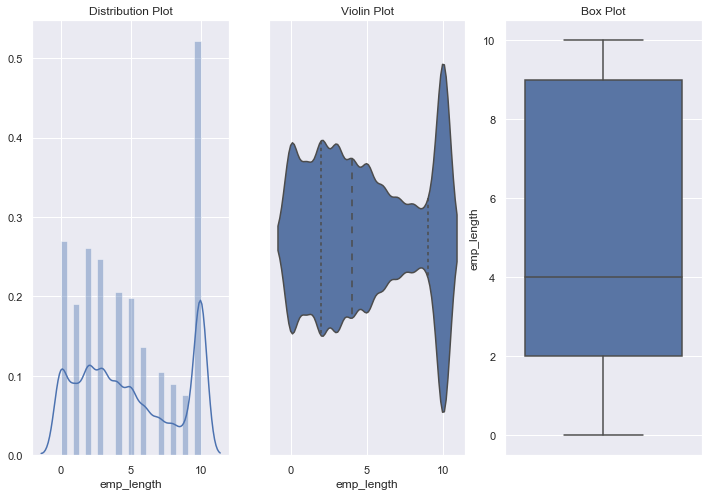

In [26]:
univariate(loan, 'emp_length', 0)

> <b>Insight:</b> People with less experience are applying more for the loan ( Exception is 10+ which is highest)

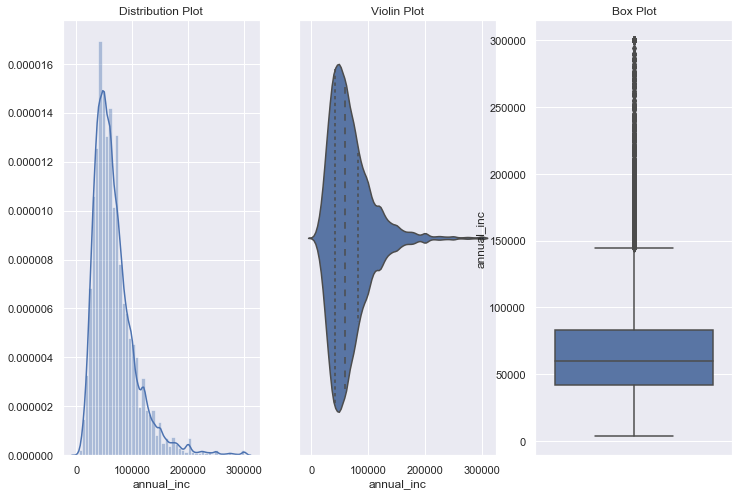

In [27]:
univariate(loan, 'annual_inc', 0)

> <b>Insight:</b> Most people applying for loan has salary between 40k and 100k

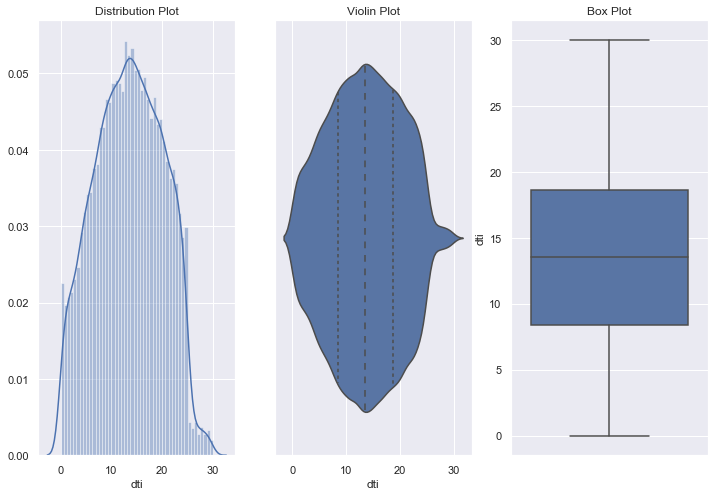

In [28]:
univariate(loan, 'dti', 0)

> <b>Insight:</b> Most loan application has dti range between 9 and 19

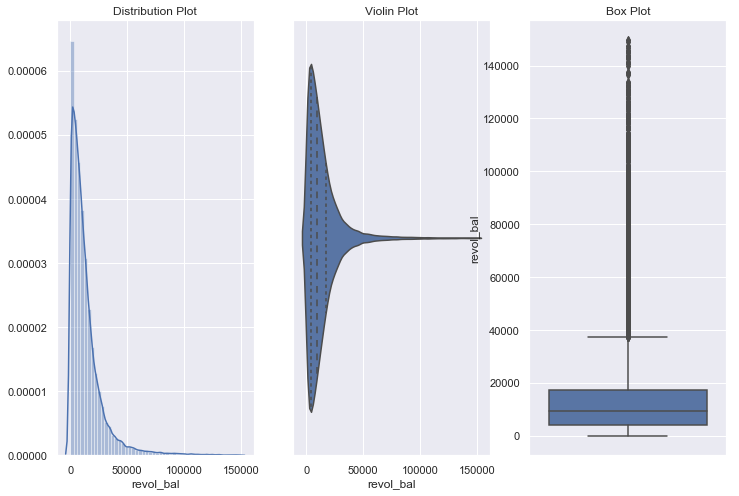

In [29]:
univariate(loan, 'revol_bal', 0)

> <b>Insight:</b> revol_bal is mostly lie below 18k

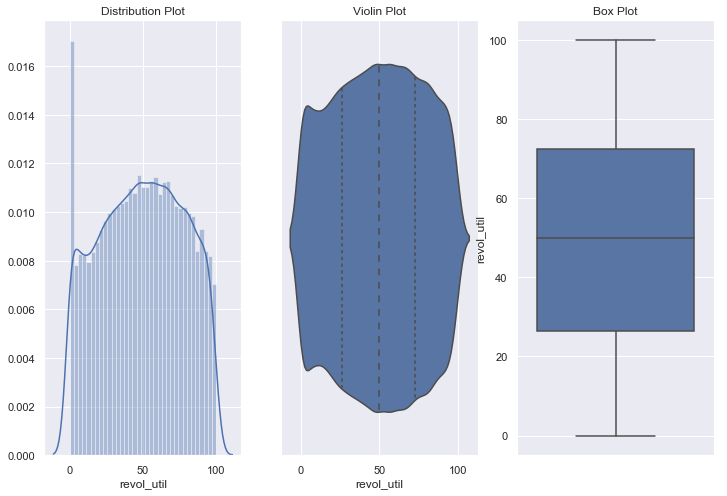

In [30]:
univariate(loan, 'revol_util', 0)

> <b>Insight:</b> revol_util ranges from 0 to 100 and equally spread out.

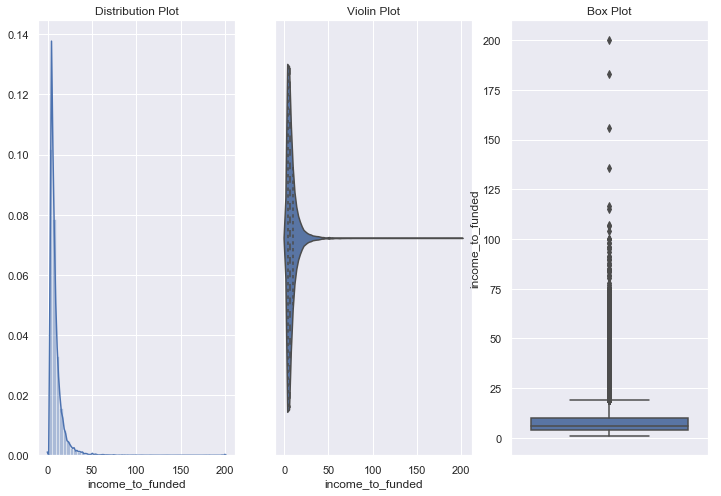

In [31]:
univariate(loan, 'income_to_funded', 0)

> <b>Insight:</b> Ratio of annual inc to funded_amnt mostly lies close to 10

In [32]:
loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                      int64
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc                int64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies      int64
avail_credit_lines        int64
income_to_funded        float64
loan_status_numeric       int64
dtype: object

> <b>Univariate Analysis</b><br>
home_ownership, purpose, int_rate_range, avail_credit_lines_range, income_to_funded_range (hue = loan_status)

In [33]:
loan.loan_status.value_counts(normalize=True)

Fully Paid    0.86
Charged Off   0.14
Name: loan_status, dtype: float64

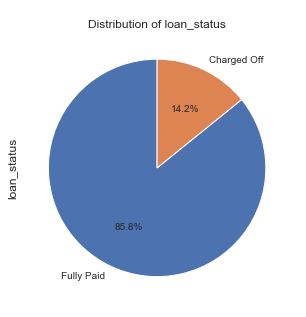

In [72]:
plot_pie(loan,'loan_status',(5,5), (1,1))

<b>Insight:</b><br>
Average 'Charged Off' is 14.36%<br>
Variables which has higher ( >> 14.36% ) probability of loan default is good condidate for loan rejection.

In [34]:
loan.home_ownership.value_counts(normalize=True)

RENT       0.47
MORTGAGE   0.45
OWN        0.07
OTHER      0.00
Name: home_ownership, dtype: float64

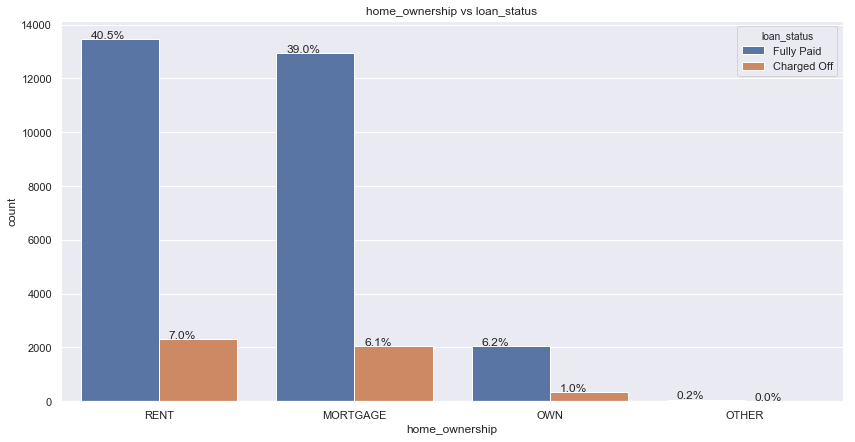

In [35]:
univariate(loan, 'home_ownership', 1, 'loan_status')

> <b>Insight:</b> People who has home ownership as 'RENT' has more tendency to default followed by 'MORTGAGE' backed by large set of data.

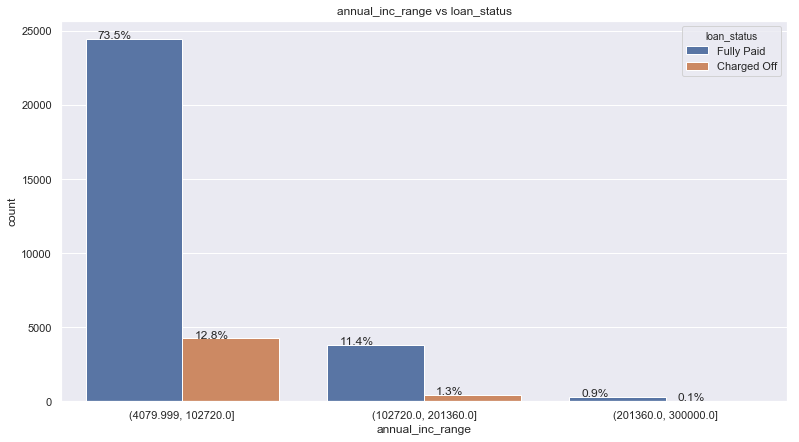

In [41]:
univariate(loan, 'annual_inc_range', 1, 'loan_status')

> <b>Insight:</b> Low income range has high tendency to default.

In [42]:
loan.purpose.value_counts(normalize=True)

debt_consolidation   0.53
credit_card          0.15
home_improvement     0.08
major_purchase       0.06
small_business       0.05
car                  0.04
wedding              0.03
medical              0.02
moving               0.02
house                0.01
vacation             0.01
Name: purpose, dtype: float64

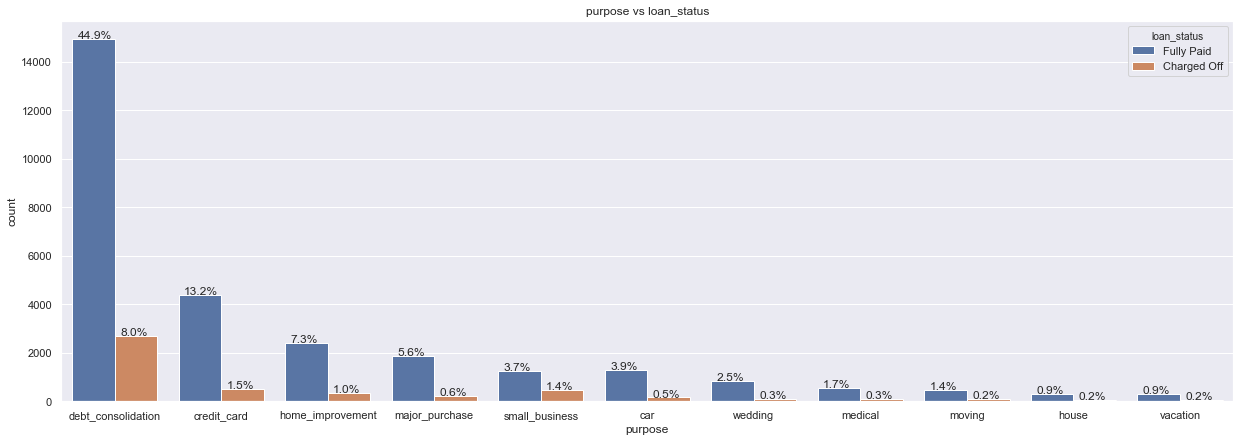

In [43]:
univariate(loan, 'purpose', 1, 'loan_status')

> <b>Insight:</b> Purpose for loan request is a major driver for loan default. Debt consolidation tops the list for loan default.

In [44]:
loan.emp_length.value_counts(normalize=True)

10   0.23
0    0.12
2    0.11
3    0.11
4    0.09
5    0.09
1    0.08
6    0.06
7    0.05
8    0.04
9    0.03
Name: emp_length, dtype: float64

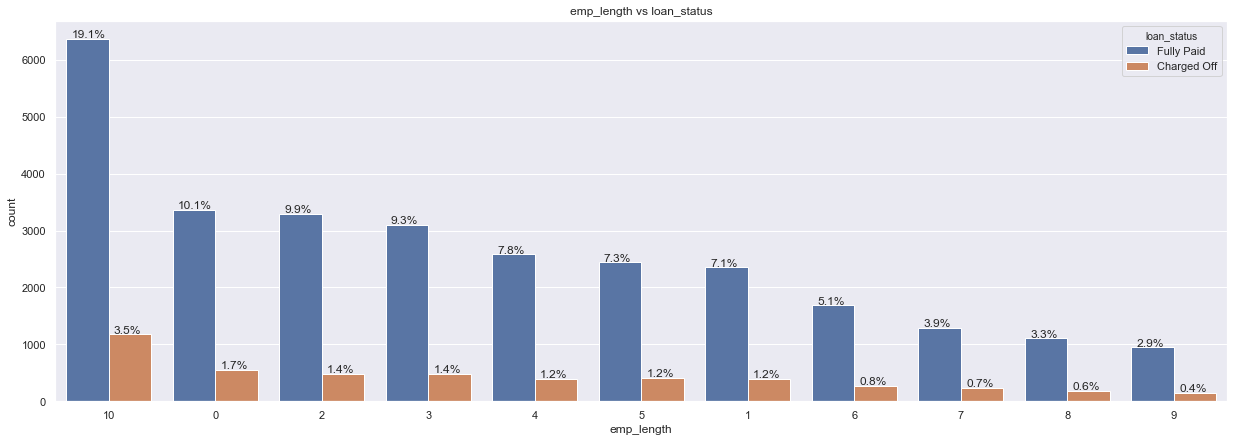

In [45]:
univariate(loan, 'emp_length', 1, 'loan_status')

> <b>Insight:</b> Borrower with less year(s) of experience has higher chance of default. Exception is 10+ years which has highest chance of default.  

In [46]:
loan.int_rate_range.value_counts(normalize=True)

(4.999, 12.0]   0.53
(12.0, 19.0]    0.43
(19.0, 26.0]    0.04
Name: int_rate_range, dtype: float64

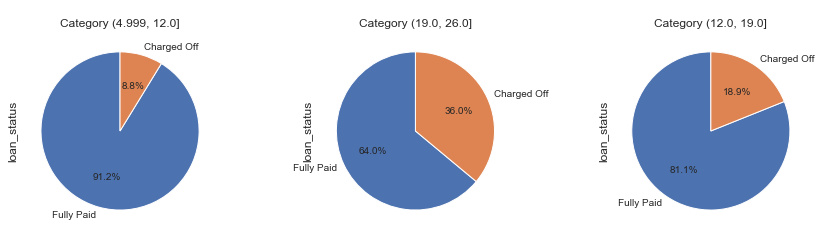

In [47]:
plot_pie(loan,'int_rate_range',(15,8), (2,3), category=1)

> <b>Insight:</b> Interest rate loan is primary driver for loan default. Higher interest rate increases the chances of loan default.

In [48]:
loan.annual_inc_range.value_counts(normalize=True)

(4079.999, 102720.0]   0.86
(102720.0, 201360.0]   0.13
(201360.0, 300000.0]   0.01
Name: annual_inc_range, dtype: float64

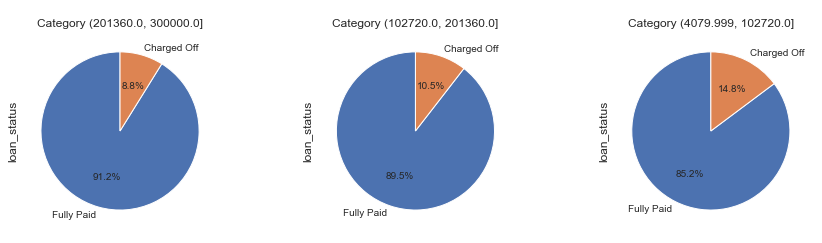

In [49]:
plot_pie(loan,'annual_inc_range',(15,8), (2,3), category=1)

> <b>Insight:</b> Higher the income better the chances of loan repayment.

In [50]:
loan.loan_amnt_range.value_counts(normalize=True)

(499.999, 12000.0]   0.65
(12000.0, 23500.0]   0.26
(23500.0, 35000.0]   0.09
Name: loan_amnt_range, dtype: float64

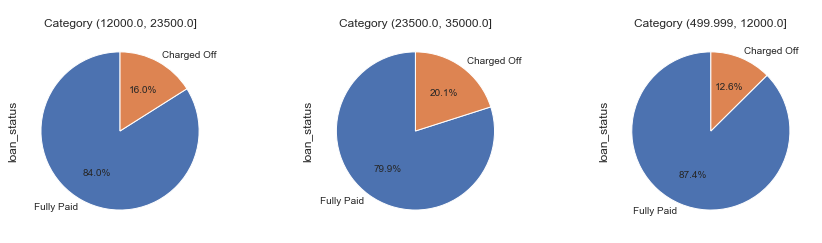

In [51]:
plot_pie(loan,'loan_amnt_range',(15,8), (2,3), category=1)

> <b>Insight:</b> Higher the loan amount better the chances of loan repayment.

In [52]:
loan.income_to_funded_range.value_counts(normalize=True)

(0.999, 68.0]    1.00
(68.0, 135.0]    0.00
(135.0, 202.0]   0.00
Name: income_to_funded_range, dtype: float64

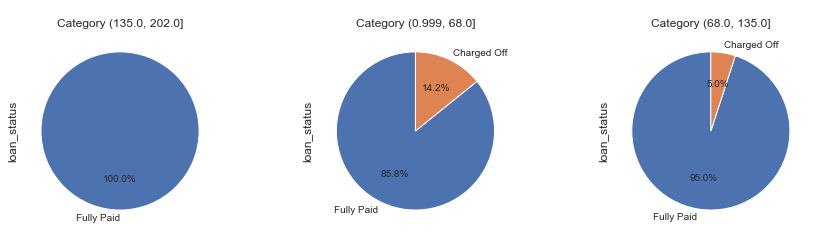

In [53]:
plot_pie(loan,'income_to_funded_range',(15,8), (2,3), category=1)

> Lower the ratio of income to funded amount, chances of loan default is high.

### Analysis of Non Numerical variables

> Analysis of "loan_status" column with  "home_ownership" & "verification" for Charged off and Fully paid loan status

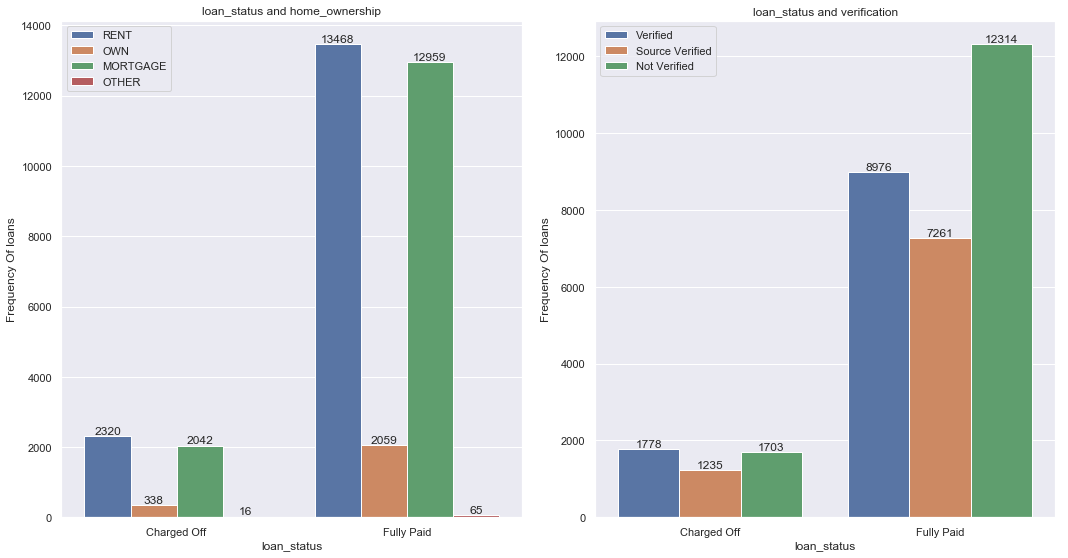

In [54]:
plt.figure(figsize=(15,15))

# subplot 1: loan_status vs home_ownership
plt.subplot(2,2,1)
ax=sns.countplot(x="loan_status",hue="home_ownership", data=loan,order=['Charged Off','Fully Paid']);
plt.title("loan_status and home_ownership")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')

# subplot 2: Verification vs loan_status
plt.subplot(2,2,2)
ax=sns.countplot(x="loan_status",hue="verification_status", data=loan,order=['Charged Off','Fully Paid']);
plt.title("loan_status and verification")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom') 
    
plt.tight_layout()     
plt.show()    

Verification status indicates if income /income source is verified by Lending Club(LC)  or not. This is an important driver variable since it informs LC about the borrower’s income/income source which is essential for loan approval and repayment. 

Home ownership is an important driver variable that gives an idea on how much monthly expenses of the borrower is dedicated to rent, mortgage, others which helps to view the financial situation of the borrower better.  In this case we see high values against **mortgage** and **rent** indicating the default borrower has high expenses which might have caused the loan default.

> Analysis of "loan_status" column with  "purpose" for Charged off and Fully paid loan status

In [56]:
# Create sub data frames based on loan status
loan_chargedOff = loan.loc[loan['loan_status'] == 'Charged Off']
loan_fullyPaid = loan.loc[loan['loan_status'] == 'Fully Paid']

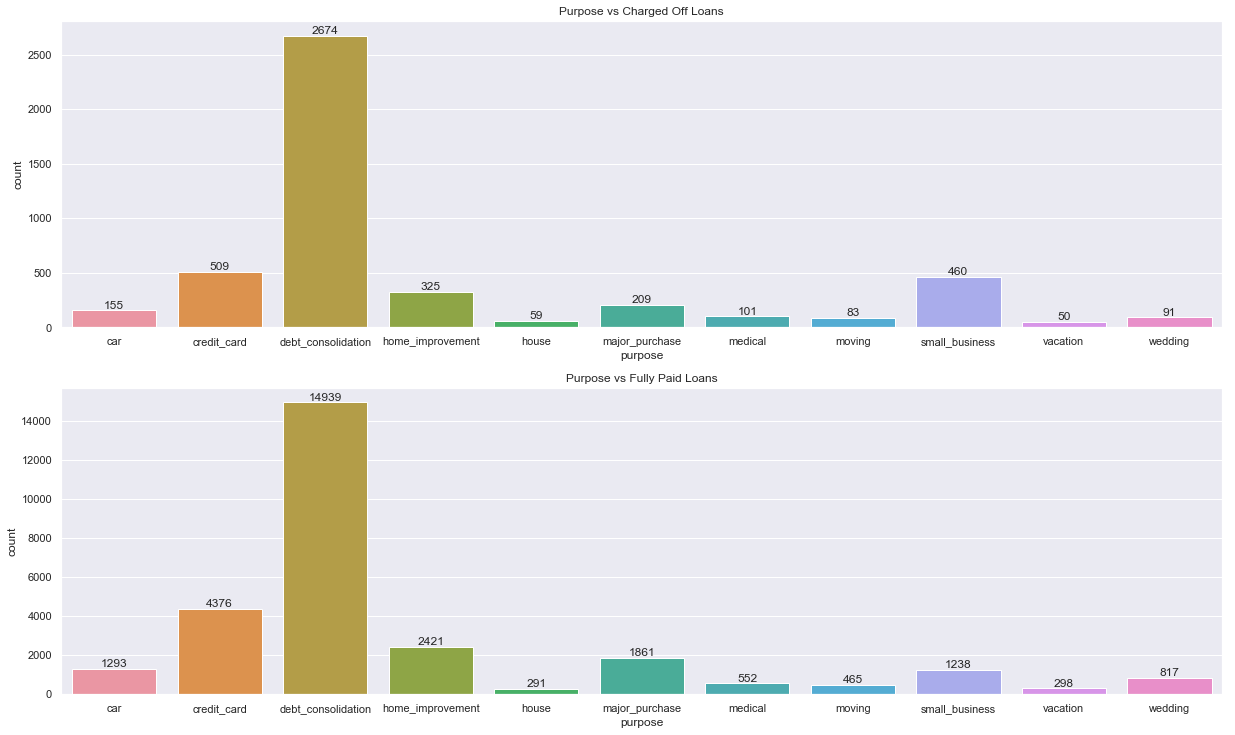

In [57]:
plt.figure(figsize=(50,15))
# subplot 1: purpose and Charged Off Loans

order = sorted(list(set(loan['purpose'])))
plt.subplot(3,3,1)
ax=sns.countplot(x="purpose", data=loan_chargedOff,order=order,orient="v")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')
plt.title('Purpose vs Charged Off Loans')

    
# subplot 2: purpose and Fully Paid Loans
plt.subplot(3,3,4)
ax=sns.countplot(x="purpose", data=loan_fullyPaid,order=order,orient="v")
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')
plt.title('Purpose vs Fully Paid Loans')

plt.tight_layout()
plt.show()

From the charge off plot we observe, debt consolidation is the main loan purpose for the borrower. Debt consolidations will help to assess the borrower’s financial situation which might not be good leading to default . Also, we observe that loan taken for small business is high .Business can fail or have low returns and the borrower will default if that is the case. 
Purpose is also one of the driver variables for predicting loan default.

> Analysis of "loan_status" column with  "addr_state" for Charged off and Fully paid loan status

No handles with labels found to put in legend.
No handles with labels found to put in legend.


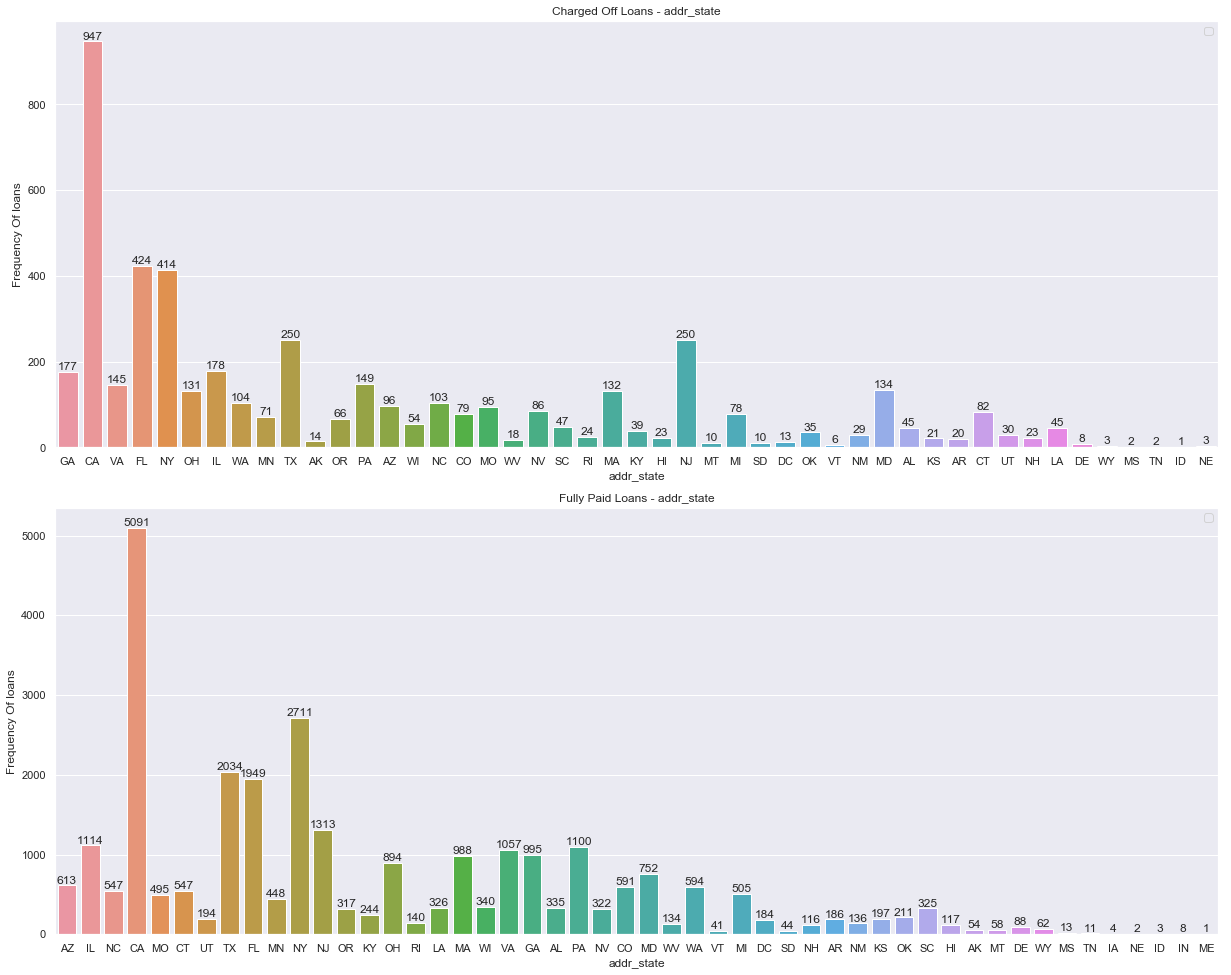

In [58]:
plt.figure(figsize=(50,20))

# subplot 1: addr_state and Charged Off Loans
plt.subplot(3,3,1)
ax=sns.countplot(x="addr_state",data=loan_chargedOff);
plt.title("Charged Off Loans - addr_state")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')



# subplot 2: addr_state and Fully Paid Loans
plt.subplot(3,3,4)
ax=sns.countplot(x="addr_state",data=loan_fullyPaid);
plt.title("Fully Paid Loans - addr_state")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')


plt.tight_layout()
plt.show()

From the above plot of charge off loans, we observe that default is higher in states like California,Florida, New York. This might be due to high cost of living , kind of employment in these states .So analysis on these factors will help to under the reason behind borrower's default. So Address State is also one of the driver variables for predicting loan default.

> Analaysis of grade for Charged off and Fully paid loan status

No handles with labels found to put in legend.
No handles with labels found to put in legend.


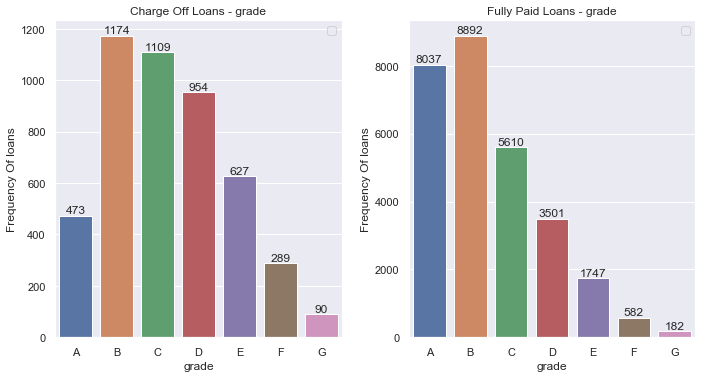

In [59]:
plt.figure(figsize=(10,10))

# subplot 1: grade vs charge off
plt.subplot(2,2,1)
ax=sns.countplot(x="grade", data=loan_chargedOff,order=['A','B','C','D','E','F','G']);
plt.title("Charge Off Loans - grade")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y), ha='center', va='bottom') 
    
   
# subplot 2: grade vs fullypaid
plt.subplot(2,2,2)
ax=sns.countplot(x="grade", data=loan_fullyPaid,order=['A','B','C','D','E','F','G']);
plt.title("Fully Paid Loans - grade")
plt.ylabel("Frequency Of loans")
plt.legend(loc='best')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(y.astype('int'), (x.mean(), y),ha='center', va='bottom')     


plt.tight_layout()
plt.show()    

We observe that in case of charged off loans there is high loan default in the grades B,C,D.Grades is related to the originator’s underwriting assessment for the individual borrower. It is related to how much risk is associated with the borrower .So Grade variable can act as driver variable to predict loan default.

### Analysis On Numerical variables

> Analysis Borrowers Credits for fully paid & charged off loan status

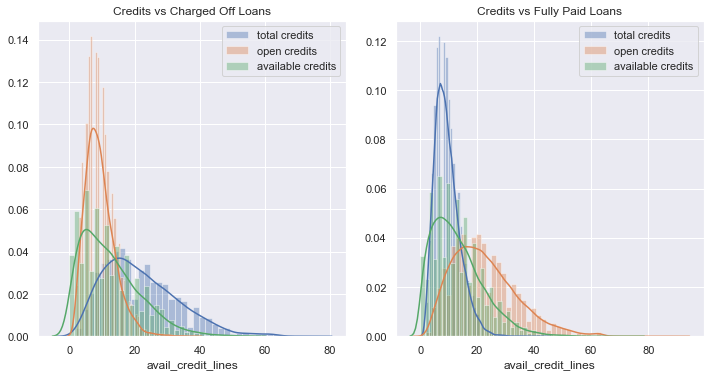

In [60]:
# plot of total acc ,open acc,availabe_acc vs fully paid & charged off loan status

legends=('total credits','open credits','available credits')

plt.figure(figsize=(15,15))
# subplot 1: Credits vs Charged Off Loans
plt.subplot(3,3,1)
p1=sns.distplot(loan_chargedOff['total_acc'])
p1=sns.distplot(loan_chargedOff['open_acc'])
p1=sns.distplot(loan_chargedOff['avail_credit_lines'])
plt.title("Credits vs Charged Off Loans")
plt.legend(legends,loc='best')


# subplot 2: Credits vs Fully Paid Loans
plt.subplot(3,3,2)
p1=sns.distplot(loan_fullyPaid['open_acc'])
p1=sns.distplot(loan_fullyPaid['total_acc'])
p1=sns.distplot(loan_fullyPaid['avail_credit_lines'])
plt.title("Credits vs Fully Paid Loans")
plt.legend(legends,loc='best')

plt.tight_layout()
plt.show()

From the above plots we observe that:
-  Charged off loans ,has a higher "open_acc"(number of open credit lines) indicating borrower's high expense. This credit information is vital while approving loans.<br>

So  **<font color=blue>"total_acc","open_acc" and "available_acc" </font> ** variables helps to predict loan default.

> Analysis of  DTI,interest rate and Loan to income ratio for each loan status

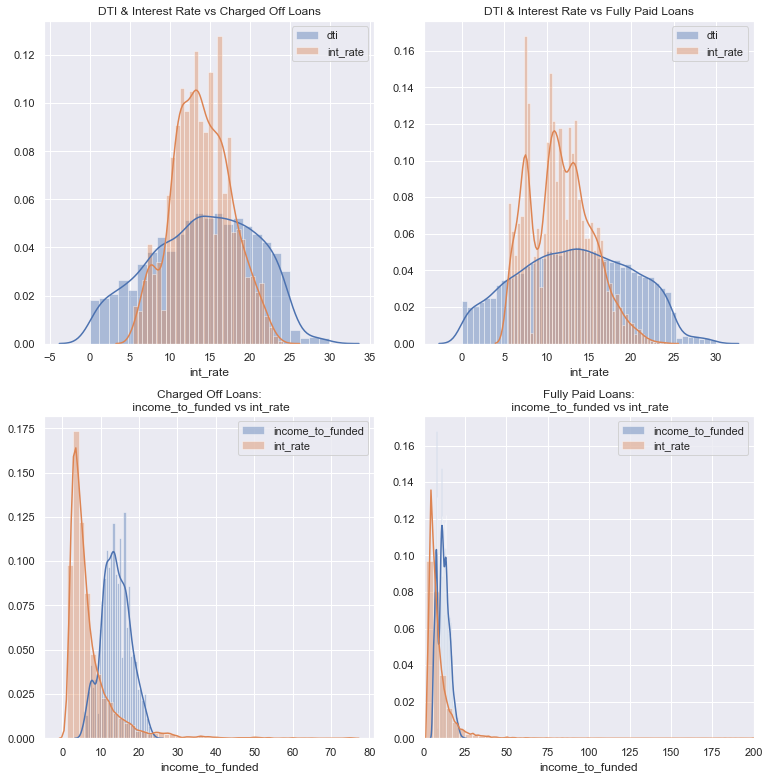

In [61]:
#plots of DTI and Interest Rate vs 2 different type of loan_status
#plots of income_to_funded vs int_rate for 2 different type of loan_status
 
plt.figure(figsize=(16,16))

# subplot 1: DTI and Interest Rate vs Charged Off Loans
plt.subplot(3,3,1)
legends=('dti','int_rate')
p1=sns.distplot(loan_chargedOff['dti'])
p1=sns.distplot(loan_chargedOff['int_rate'])
plt.title("DTI & Interest Rate vs Charged Off Loans")
plt.legend(legends,loc='best')

# subplot 2: DTI and Interest Rate vs Fully Paid Loans
plt.subplot(3,3,2)
p1=sns.distplot(loan_fullyPaid['dti'])
p1=sns.distplot(loan_fullyPaid['int_rate'])
plt.title("DTI & Interest Rate vs Fully Paid Loans")
plt.legend(legends,loc='best')

# subplot 3: Charged Off Loans: income_to_funded vs int_rate
plt.subplot(3,3,4)
legends=['income_to_funded','int_rate']
p1=sns.distplot(loan_chargedOff['int_rate'])
p1=sns.distplot(loan_chargedOff['income_to_funded'])
plt.title("Charged Off Loans:\n income_to_funded vs int_rate")
plt.legend(legends,loc='best')

# subplot 4: Fully Paid Loans: income_to_funded vs int_rate
plt.subplot(3,3,5)
p1=sns.distplot(loan_fullyPaid['int_rate'])
p1=sns.distplot(loan_fullyPaid['income_to_funded'])
plt.xlim(0,200)
plt.title("Fully Paid Loans:\n income_to_funded vs int_rate")
plt.legend(legends,loc='best')

plt.tight_layout()
plt.show()


From the above plots we observe that: 
-  Charged off loans, has high "int_rate" when "dti" is high.<br> 
-  "int_rate" is high when "income_to_funded"(annual_income/funded_amnt)"  is high.<br>  

So <font color=blue>"annual_income","dti","int_rate" and "funded_amnt"</font>** variables helps to predict loan default.

> Analysis of derogatory public records and public record bankruptcies for each loan status

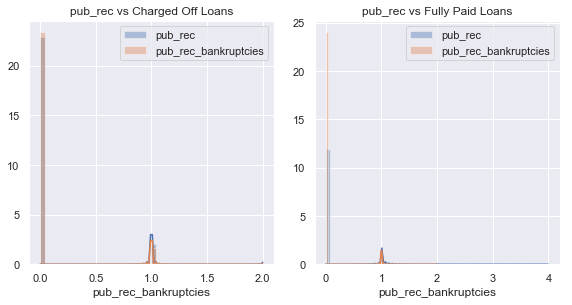

In [62]:
#plots of pub_rec & pub_rec_bankruptcies for each loan status
plt.figure(figsize=(12,12))

# subplot 1: pub_rec vs Charged Off Loans
plt.subplot(3,3,1)
legend=('pub_rec','pub_rec_bankruptcies')
sns.distplot(loan_chargedOff['pub_rec'])
sns.distplot(loan_chargedOff['pub_rec_bankruptcies'])
plt.title("pub_rec vs Charged Off Loans")
plt.legend(legend,loc='best')

# subplot 2: pub_rec vs Fully Paid Loans
plt.subplot(3,3,2)
sns.distplot(loan_fullyPaid['pub_rec'])
sns.distplot(loan_fullyPaid['pub_rec_bankruptcies'])
plt.title("pub_rec vs Fully Paid Loans")
plt.legend(legend,loc='best')

plt.tight_layout()
plt.show()


From the above plots we can observe that:
-  "pub_rec" and " pub_rec_bankruptcies" are high in terms of charged off compared to fully paid loans. It gives an idea about the borrower's financial situation which is important for loan approval.

So  <font color=blue>"pub_rec" and" pub_rec_bankruptcies"</font> variables helps to predict default loans.

> Analysis of delinq_2yrs variable with respect to each loan status

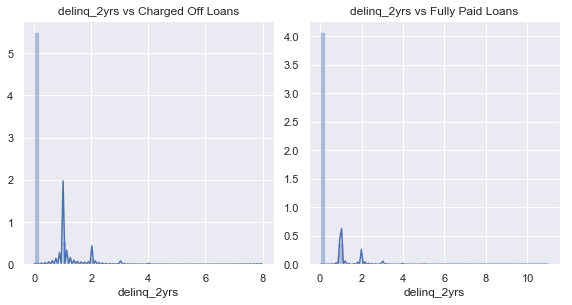

In [63]:
# plots of delinq_2yrs w.r.t each loan status
plt.figure(figsize=(12,12))

# subplot 1: delinq_2yrs vs Charged Off Loans
plt.subplot(3,3,1)
sns.distplot(loan_chargedOff['delinq_2yrs'])
plt.title("delinq_2yrs vs Charged Off Loans")

# subplot 2: delinq_2yrs vs Fully Paid Loans
plt.subplot(3,3,2)
sns.distplot(loan_fullyPaid['delinq_2yrs'])
plt.title("delinq_2yrs vs Fully Paid Loans")

plt.tight_layout()
plt.show() 

delinq_2yrs (which is the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years ) is an important feature to see the trend of default .From above plots,for Fully paids loans,delinq_2yrs provides a past trend of the borrower.

So delinq_2yrs(checking the past record of the borrower) variables helps to predict default loans.

> Analysis of revolving balance and Revolving line utilization rate for each loan status

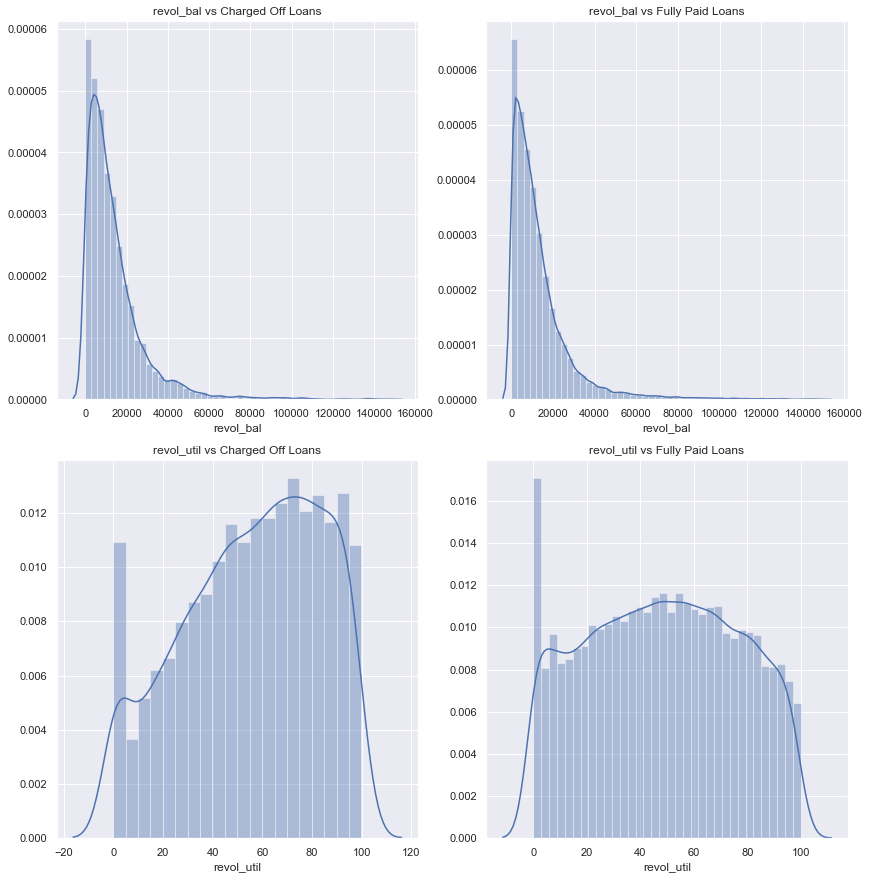

In [64]:
# Plots of revol_bal ,revol_util w.r.t each loan status
plt.figure(figsize=(18,18))

# subplot 1: revol_bal vs Charged Off Loans
plt.subplot(3,3,1)
sns.distplot(loan_chargedOff['revol_bal'])
plt.title("revol_bal vs Charged Off Loans")

# subplot 2: revol_bal vs Fully Paid Loans
plt.subplot(3,3,2)
sns.distplot(loan_fullyPaid['revol_bal'])
plt.title("revol_bal vs Fully Paid Loans")

# subplot 3: revol_util vs Charged Off Loans
plt.subplot(3,3,4)
sns.distplot(loan_chargedOff['revol_util'])
plt.title("revol_util vs Charged Off Loans")

# subplot 4: revol_util vs Fully Paid Loans
plt.subplot(3,3,5)
sns.distplot(loan_fullyPaid['revol_util'])
plt.title("revol_util vs Fully Paid Loans")

plt.tight_layout()
plt.show() 

From above plot,we observe that:
-  "revol_util"(i.e. the amount of credit the borrower is using relative to all available revolving credit) and "revol_bal" is high for charged off compared to fully paid loans.These two variables provides credit information about the borrower.

So,<font color=blue>"revol_util" and "revol bal" </font>variables helps to predict default loans.

> Analysis of Employment length for each loan status

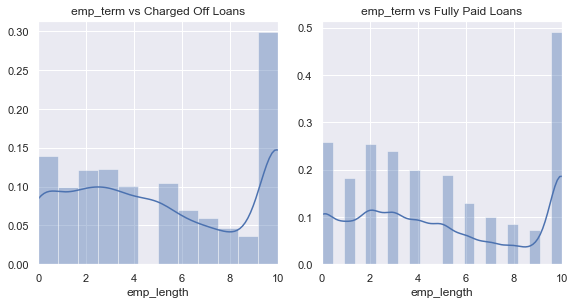

In [65]:
# Plots of emp_length vs loan_status
plt.figure(figsize=(12,12))

# subplot 1: emp_term vs Charged Off Loans
plt.subplot(3,3,1)
p1=sns.distplot(loan_chargedOff['emp_length'])
plt.title("emp_term vs Charged Off Loans")
plt.xlim(0,10)

# subplot 2: emp_term vs Fully Paid Loans
plt.subplot(3,3,2)
p1=sns.distplot(loan_fullyPaid['emp_length'])
plt.title("emp_term vs Fully Paid Loans")
plt.xlim(0,10)

plt.tight_layout()
plt.show()

We observe that the for shorter duration of employment, default is high. So emp_term too becomes one of the driver variables in predicting loan default (exception is 10+ years)

> Analysis of int_rate vs annual_inc ,dti vs int_rate  & revol_bal vs annual_inc w.r.t loan_status

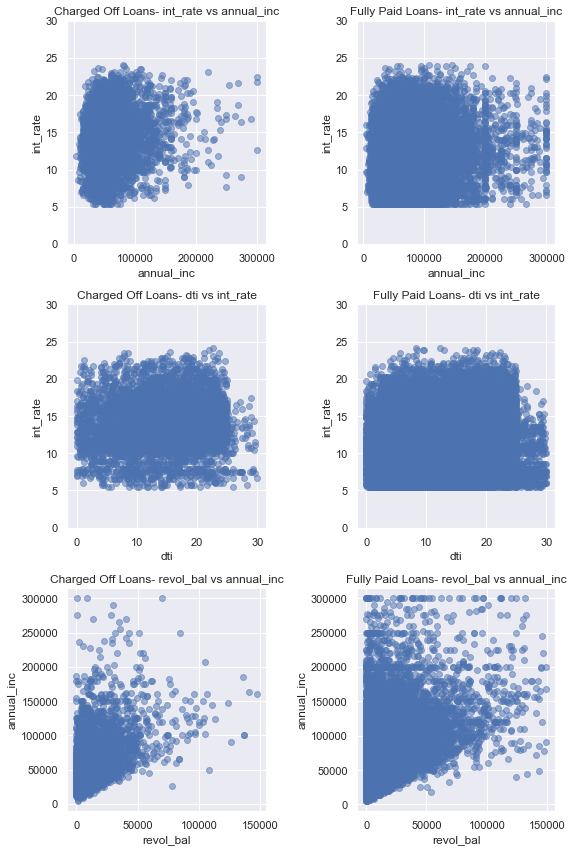

In [76]:
# int_rate vs annual_inc ,dti vs int_rate  & revol_bal vs annual_inc w.r.t loan_status

plt.figure(figsize=(12,12))

# subplot 1: Charged Off Loans- int_rate vs annual_inc
plt.subplot(3,3,1)
plt.scatter(loan_chargedOff['annual_inc'], loan_chargedOff['int_rate'], alpha=0.5)
plt.title("Charged Off Loans- int_rate vs annual_inc")
plt.xlabel('annual_inc')
plt.ylabel('int_rate')
plt.ylim(0,30)

# subplot 2: Fully Paid Loans- int_rate vs annual_inc
plt.subplot(3,3,2)
plt.scatter(loan_fullyPaid['annual_inc'],loan_fullyPaid['int_rate'], alpha=0.5)
plt.title("Fully Paid Loans- int_rate vs annual_inc")
plt.xlabel('annual_inc')
plt.ylabel('int_rate')
plt.ylim(0,30)

# subplot 3: Charged Off Loans- dti vs int_rate
plt.subplot(3,3,4)
plt.scatter(loan_chargedOff['dti'],loan_chargedOff['int_rate'], alpha=0.5)
plt.title("Charged Off Loans- dti vs int_rate")
plt.xlabel('dti')
plt.ylabel('int_rate')
plt.ylim(0,30)

# subplot 4: Fully Paid Loans- dti vs int_rate
plt.subplot(3,3,5)
plt.scatter(loan_fullyPaid['dti'],loan_fullyPaid['int_rate'], alpha=0.5)
plt.title("Fully Paid Loans- dti vs int_rate")
plt.xlabel('dti')
plt.ylabel('int_rate')
plt.ylim(0,30)

# subplot 5: Charged Off Loans - revol_bal vs annual_inc
plt.subplot(3,3,7)
plt.scatter(loan_chargedOff['revol_bal'], loan_chargedOff['annual_inc'], alpha=0.5)
plt.title("Charged Off Loans- revol_bal vs annual_inc")
plt.xlabel('revol_bal')
plt.ylabel('annual_inc')

# subplot 6: Fully Paid Loans- revol_bal vs annual_inc
plt.subplot(3,3,8)
plt.scatter(loan_fullyPaid['revol_bal'], loan_fullyPaid['annual_inc'], alpha=0.5)
plt.title("Fully Paid Loans- revol_bal vs annual_inc")
plt.xlabel('revol_bal')
plt.ylabel('annual_inc')

plt.tight_layout()
plt.show()

From above plots,we observe that:
-  "int_rate" is  dependent on "annual_inc".
-  "DTI" and "revol_bal" is dependent on "annual _inc".


So <font color=blue>"int_rate" ,"annual_inc","DTI" and "revol_bal"</font> varaiables helps to predict loan default.

> Analysis of Revolving line utilization rate & interest rate for each of loan status

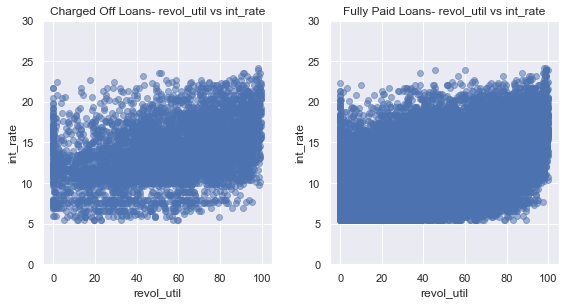

In [67]:
# Plots of "revol_util" vs "int_rate" w.r.t loan_status
plt.figure(figsize=(12,12))

# subplot 1: Charged Off Loans- revol_util vs int_rate
plt.subplot(3,3,1)
plt.scatter(loan_chargedOff['revol_util'], loan_chargedOff['int_rate'], alpha=0.5)
plt.title("Charged Off Loans- revol_util vs int_rate")
plt.xlabel('revol_util')
plt.ylabel('int_rate')
plt.ylim(0,30)

# subplot 2: Fully Paid Loans- revol_util vs int_rate
plt.subplot(3,3,2)
plt.scatter(loan_fullyPaid['revol_util'], loan_fullyPaid['int_rate'], alpha=0.5)
plt.title("Fully Paid Loans- revol_util vs int_rate")
plt.xlabel('revol_util')
plt.ylabel('int_rate')
plt.ylim(0,30)

plt.tight_layout()
plt.show()

From above plots,We can observe that:
-  "int_rate" is also dependent on "revol_util".

So <font color=blue>"int_rate"</font> variable helps to predict loan default.

> Analysis of Annual income,funded amount and installements for each of loan status

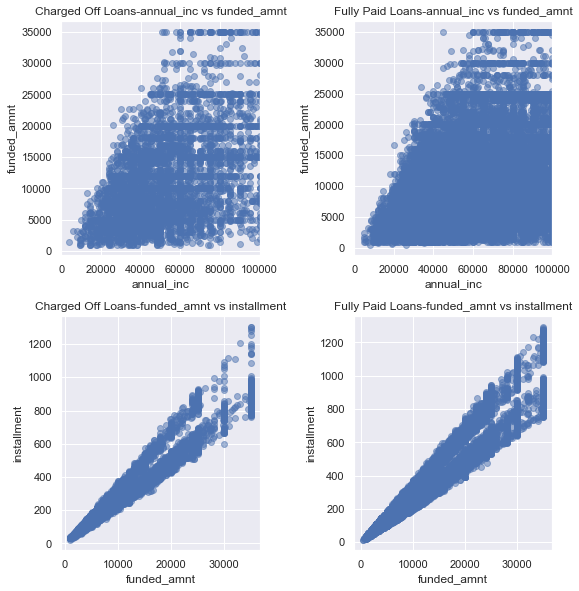

In [68]:
# annual_inc vs funded_amnt & funded_amnt vs installment w.r.t loan_status

plt.figure(figsize=(12,12))

# subplot 1: Charged Off Loans-annual_inc vs funded_amnt
plt.subplot(3,3,1)
plt.scatter(loan_chargedOff['annual_inc'], loan_chargedOff['funded_amnt'], alpha=0.5)
plt.title("Charged Off Loans-annual_inc vs funded_amnt")
plt.xlim(0,100000)
plt.xlabel('annual_inc')
plt.ylabel('funded_amnt')

# subplot 2: Fully Paid Loans-annual_inc vs funded_amnt
plt.subplot(3,3,2)
plt.scatter(loan_fullyPaid['annual_inc'], loan_fullyPaid['funded_amnt'], alpha=0.5)
plt.title("Fully Paid Loans-annual_inc vs funded_amnt")
plt.xlim(0,100000)
plt.xlabel('annual_inc')
plt.ylabel('funded_amnt')

# subplot 3: Charged Off Loans-funded_amnt vs installment
plt.subplot(3,3,4)
plt.scatter(loan_chargedOff['funded_amnt'], loan_chargedOff['installment'], alpha=0.5)
plt.title("Charged Off Loans-funded_amnt vs installment")
plt.xlabel('funded_amnt')
plt.ylabel('installment')

# subplot 4: Fully Paid Loans-funded_amnt vs installment
plt.subplot(3,3,5)
plt.scatter(loan_fullyPaid['funded_amnt'], loan_fullyPaid['installment'], alpha=0.5)
plt.title("Fully Paid Loans-funded_amnt vs installment")
plt.xlabel('funded_amnt')
plt.ylabel('installment')

plt.tight_layout()
plt.show()

From above plots,we can consider that:
-  "funded_amnt" is dependent on "annual_inc".
-  "installment" is dependent on "funded_amount.

So we can consider that combination of these driver variables("funded_amnt","annual_inc","installment")  helps to predict loan default.

> Analysis of loan term vs annual income ,Loan term vs funded amount,term vs interest rate & term vs debt obligations for Charged off & Fully paid loan status 

## Conclusion

For loans to be approved for funding, the following features are the driver variables to predict loan default:

<b>annual_inc, interest_rate ,loan_amnt, funded_amnt, dti, emp_length, home_ownership, purpose, revol_bal, revol_util, credit information(total_acc,open_acc,avai_acc), addr_state, grade, delinq_2yrs (check on past record- if there has been any default by he borrower)<b>


### Important driver variables (i.e. variables which are strong indicators of default).

> <b>Grade, Purpose, Interest Rate, Employee Length, Loan Amount, Home Ownership and Annual Income<b>

### Top driving factors behind loan default

In [69]:
driver = ['grade','purpose','int_rate','emp_length', 'loan_amnt', 'home_ownership', 'annual_inc']
loan_stats[loan_stats['LoanStatNew'].isin(driver)]

,LoanStatNew,Description
1,annual_inc,The self-reported annual income provided by th...
4,emp_length,Employment length in years. Possible values ar...
6,grade,LC assigned loan grade
7,home_ownership,The home ownership status provided by the borr...
9,int_rate,Interest Rate on the loan
10,loan_amnt,The listed amount of the loan applied for by t...
15,purpose,A category provided by the borrower for the lo...


In [70]:
loan.dtypes

loan_amnt                     int64
funded_amnt                   int64
term                          int64
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_length                    int64
home_ownership               object
annual_inc                    int64
verification_status          object
loan_status                  object
purpose                      object
addr_state                   object
dti                         float64
delinq_2yrs                   int64
open_acc                      int64
pub_rec                       int64
revol_bal                     int64
revol_util                  float64
total_acc                     int64
pub_rec_bankruptcies          int64
avail_credit_lines            int64
income_to_funded            float64
loan_status_numeric           int64
loan_amnt_range              object
int_rate_range               object
annual_inc_range            